Loading custom YOLO model from: /home/temgar.s/runs/detect/train6/weights/best.pt
Using test image: /home/temgar.s/pneumonia_dataset/Pneumonia/Test/131224d5-2c75-4cf6-aeda-b2dce902291a.png

image 1/1 /home/temgar.s/pneumonia_dataset/Pneumonia/Test/131224d5-2c75-4cf6-aeda-b2dce902291a.png: 256x256 3 pneumonias, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)
Raw Detection Results:
Box 1: xywh: [     385.89      539.75      222.42      452.91], conf: 0.11743263900279999, class: 0
Box 2: xywh: [      724.5      557.34       240.7      568.59], conf: 0.10058452188968658, class: 0
Box 3: xywh: [     380.16      567.98      196.78      349.48], conf: 0.07640071958303452, class: 0

Using raw (unfiltered) detection results.


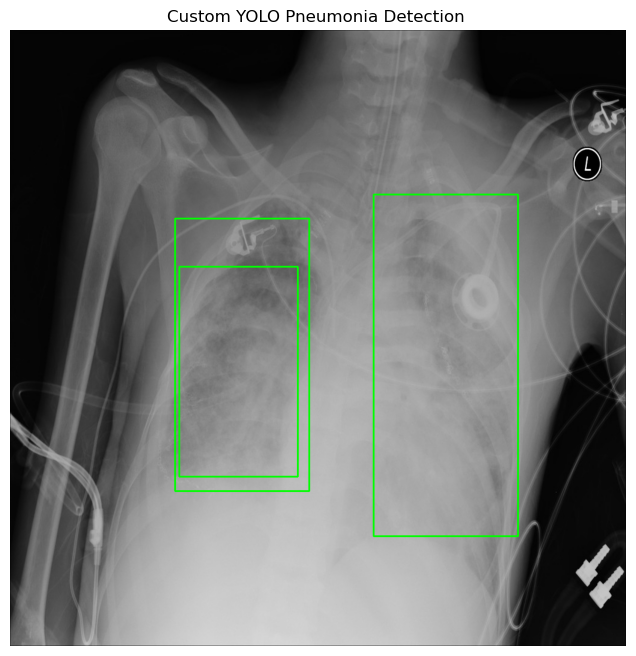

In [9]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image, ImageFile
from tqdm import tqdm
ImageFile.LOAD_TRUNCATED_IMAGES = True



def xywh_to_xyxy(box):
   
   # Convert a box from (x_center, y_center, width, height)
   # to xmin, ymin, xmax, ymax format.
    x_center, y_center, w, h = box
    xmin = x_center - w / 2.
    ymin = y_center - h / 2.
    xmax = x_center + w / 2.
    ymax = y_center + h / 2.
    return xmin, ymin, xmax, ymax


#load - Custom YOLO Model
model_path = "/home/temgar.s/runs/detect/train6/weights/best.pt" 
print("Loading custom YOLO model from:", model_path)
yolo_model = YOLO(model_path)

#giving the IMG
test_image_path = "/home/temgar.s/pneumonia_dataset/Pneumonia/Test/131224d5-2c75-4cf6-aeda-b2dce902291a.png"
print("Using test image:", test_image_path)

#Run
results = yolo_model.predict(source=test_image_path, conf=0.05)

if results:
    detection_result = results[0]
    boxes_obj = detection_result.boxes
    if boxes_obj is None or len(boxes_obj) == 0:
        print("No bounding boxes detected.")
    else:
        print("Raw Detection Results:")
        raw_boxes = []
        raw_confs = []
        raw_classes = []
        for idx, box in enumerate(boxes_obj):
    
            xywh = box.xywh.cpu().numpy().flatten()
            conf = float(box.conf.cpu().numpy().flatten()[0])
            cls = int(box.cls.cpu().numpy().flatten()[0])
            print(f"Box {idx+1}: xywh: {xywh}, conf: {conf}, class: {cls}")
            raw_boxes.append(xywh)
            raw_confs.append(conf)
            raw_classes.append(cls)
        
        print("\nUsing raw (unfiltered) detection results.")
        
        manual_img = cv2.imread(test_image_path)
        for box in raw_boxes:
            xmin, ymin, xmax, ymax = xywh_to_xyxy(box)
            cv2.rectangle(manual_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        
        annotated_img_rgb = cv2.cvtColor(manual_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 8))
        plt.imshow(annotated_img_rgb)
        plt.title("Custom YOLO Pneumonia Detection ")
        plt.axis("off")
        plt.show()
else:
    print("No results returned.Please check your model path and test IMG.")


c1a1144a-91c5-466b-b707-6303b2dc5500.png